In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from predict import evaluate_classification

In [3]:
data = pd.read_csv("./data/nsl-kdd/Train_Data.csv")
test = pd.read_csv("./data/nsl-kdd/Test_Data.csv")

In [5]:
X_train = data.iloc[:,data.columns!='label']
y_train = data.iloc[:,data.columns=='label'] 

X_test = test.iloc[:,test.columns!='label']
y_test = test.iloc[:,test.columns=='label']

print(f"{X_train.shape}")
print(f"{y_train.shape}")
print(f"{X_test.shape}")
print(f"{y_test.shape}")

(113270, 41)
(113270, 1)
(17171, 41)
(17171, 1)


In [7]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,8,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,40,8,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,44,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,8,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,8,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
y_train.head()

,label
0,1
1,1
2,0
3,1
4,1


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

model = RandomForestClassifier()
model.fit(X_train, y_train)

# 1. Mean Decrease Impurity
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Độ quan trọng (Mean Decrease Impurity):")
print(feature_importance_df)

# 2. Mean Decrease Accuracy (Permutation Importance)
results = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
perm_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': results.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print("\nĐộ quan trọng (Permutation Importance):")
print(perm_importance_df)

Độ quan trọng (Mean Decrease Impurity):
                        Feature    Importance
28                same_srv_rate  1.491153e-01
3                          flag  1.374172e-01
4                     src_bytes  9.299172e-02
29                diff_srv_rate  9.178763e-02
5                     dst_bytes  8.253107e-02
38     dst_host_srv_serror_rate  6.919340e-02
22                        count  6.066602e-02
37         dst_host_serror_rate  5.601964e-02
25              srv_serror_rate  3.355004e-02
34       dst_host_diff_srv_rate  2.922141e-02
33       dst_host_same_srv_rate  2.567119e-02
23                    srv_count  2.419529e-02
1                 protocol_type  1.982335e-02
24                  serror_rate  1.569669e-02
7                wrong_fragment  1.473468e-02
31               dst_host_count  1.368560e-02
2                       service  1.152039e-02
32           dst_host_srv_count  1.092190e-02
40     dst_host_srv_rerror_rate  1.079040e-02
35  dst_host_same_src_port_rate  8.38467

In [13]:
import itertools 
from tabulate import tabulate

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [15]:
X_train = X_train[selected_features]
# Training dataset is updated to include only the selected features (10 features chosen by RFE)
X_test = X_test[selected_features]

Training time:  7.5409605503082275
Training Accuracy Random forest 99.9955857685177  Test Accuracy Random forest 90.30924232717955
Training Precesion Random forest 99.99851499851499  Test Precesion Random forest 85.95942443471266
Training Recall Random forest 99.99406025867573  Test Recall Random forest 99.04232313870868


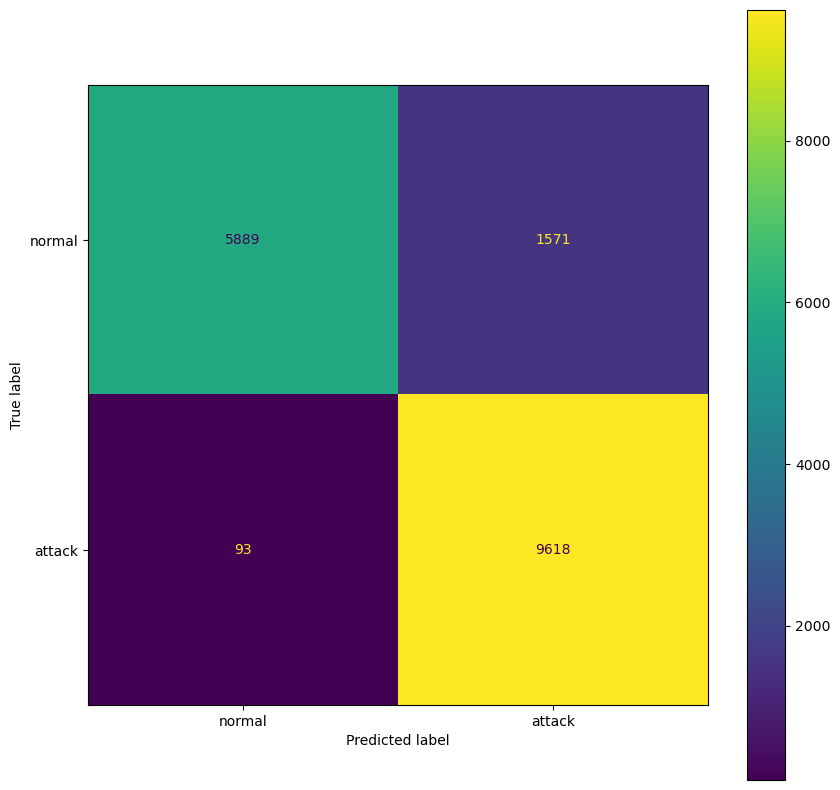

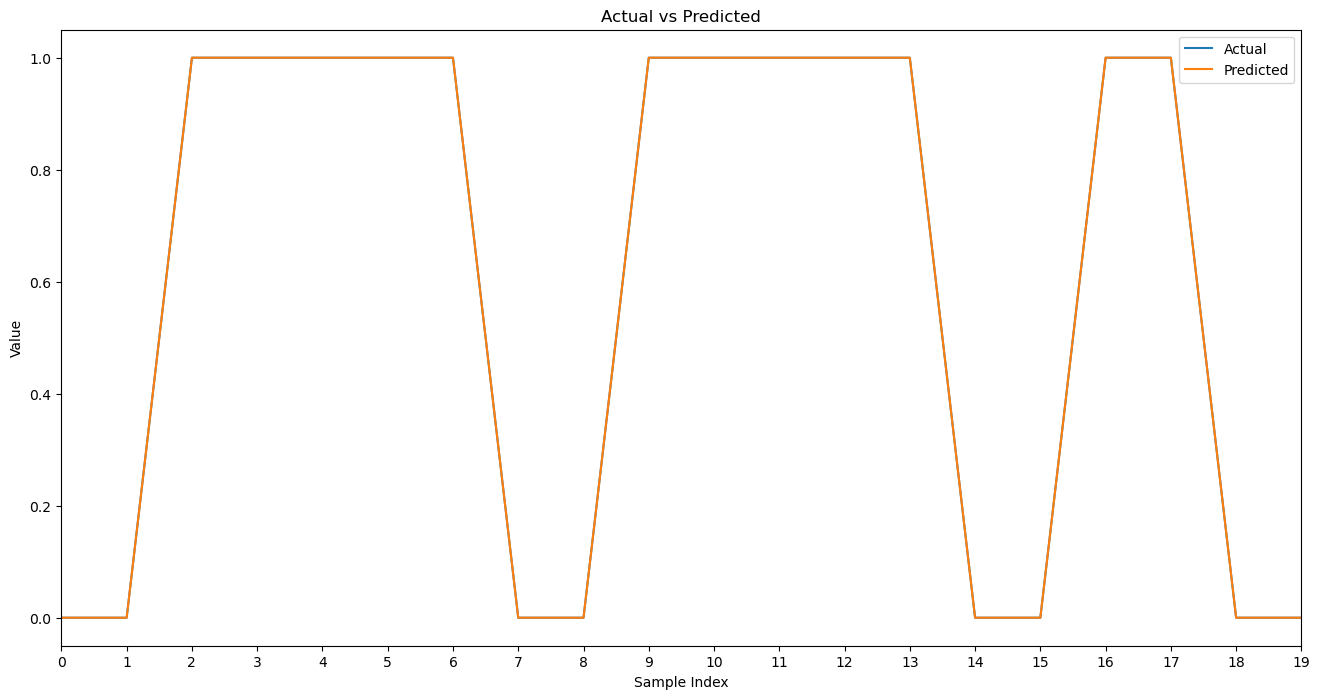

In [17]:
import time
np.random.seed(42)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
start_time = time.time()

#Fitting the model to the data 
clf.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

evaluate_classification(clf, "Random forest", X_train, X_test, y_train, y_test)

In [19]:
start_time = time.time()
y_preds = clf.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.24007701873779297


In [21]:
acc1=accuracy_score(y_preds,y_test)
acc1

0.9030924232717955

In [23]:
clf.score(X_train, y_train)

0.999955857685177

In [25]:
clf.score(X_test, y_test)

0.9030924232717955

In [27]:
import pickle
# Lưu mô hình RFE đã huấn luyện
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [29]:
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    test1 = loaded_model.predict([[0,1,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,2,0.00,0.00,1.00,1.00,0.02,0.07,0.00,255,2,0.01,0.07,0.00,0.00,0.00,0.00,1.00,1.00]])

ValueError: X has 41 features, but RandomForestClassifier is expecting 28 features as input.